## Part 1: Data Analysis

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Load training and test data
train=pd.read_csv('Mobile Price/train.csv')
test=pd.read_csv('Mobile Price/test.csv')

In [3]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [4]:
# Check for missing values
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
# Check shape of data
train.shape,test.shape

((2000, 21), (1000, 21))

In [6]:
# Inspect data
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [8]:
# Inspect data types and summary stats
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
#Descriptive statistics for all features
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
train['price_range'].unique()

array([1, 2, 3, 0])

In [11]:
train.price_range.value_counts().sort_index()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

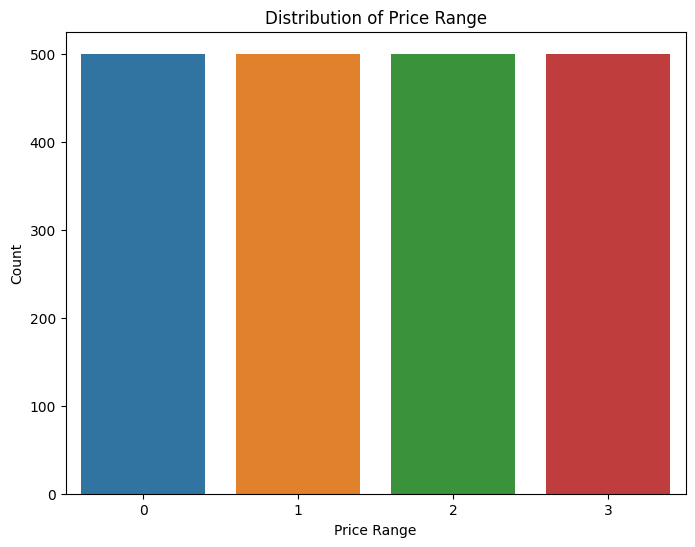

In [12]:
# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train)
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

In [20]:
# Initialize an empty dictionary to store unique value counts for each feature
unique_counts = {}

# Loop through all columns in the dataset
for column in train.columns:
    unique_values = train[column].nunique()
    unique_counts[column] = unique_values

# Sort the features by the number of unique values in ascending order
sorted_features = sorted(unique_counts.items(), key=lambda x: x[1])

# Print the feature names and their corresponding unique value counts
for feature, count in sorted_features:
    print(f"{feature}: {count} unique values")

blue: 2 unique values
dual_sim: 2 unique values
four_g: 2 unique values
three_g: 2 unique values
touch_screen: 2 unique values
wifi: 2 unique values
price_range: 4 unique values
n_cores: 8 unique values
m_dep: 10 unique values
sc_h: 15 unique values
sc_w: 19 unique values
talk_time: 19 unique values
fc: 20 unique values
pc: 21 unique values
clock_speed: 26 unique values
int_memory: 63 unique values
mobile_wt: 121 unique values
battery_power: 1094 unique values
px_width: 1109 unique values
px_height: 1137 unique values
ram: 1562 unique values


In [19]:
# Initialize empty lists to store numerical and categorical feature names
numerical_features = []
categorical_features = []

# Set a threshold for the number of unique values to classify as categorical
categorical_threshold = 10

# Loop through all columns in the dataset
for column in train.columns:
    if train[column].nunique() <= categorical_threshold:
        # If the number of unique values is below or equal to the threshold, consider it categorical
        categorical_features.append(column)
    else:
        # Otherwise, consider it numerical
        numerical_features.append(column)
# Print the identified numerical and categorical features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

Numerical Features: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
Categorical Features: ['blue', 'dual_sim', 'four_g', 'm_dep', 'n_cores', 'three_g', 'touch_screen', 'wifi', 'price_range']


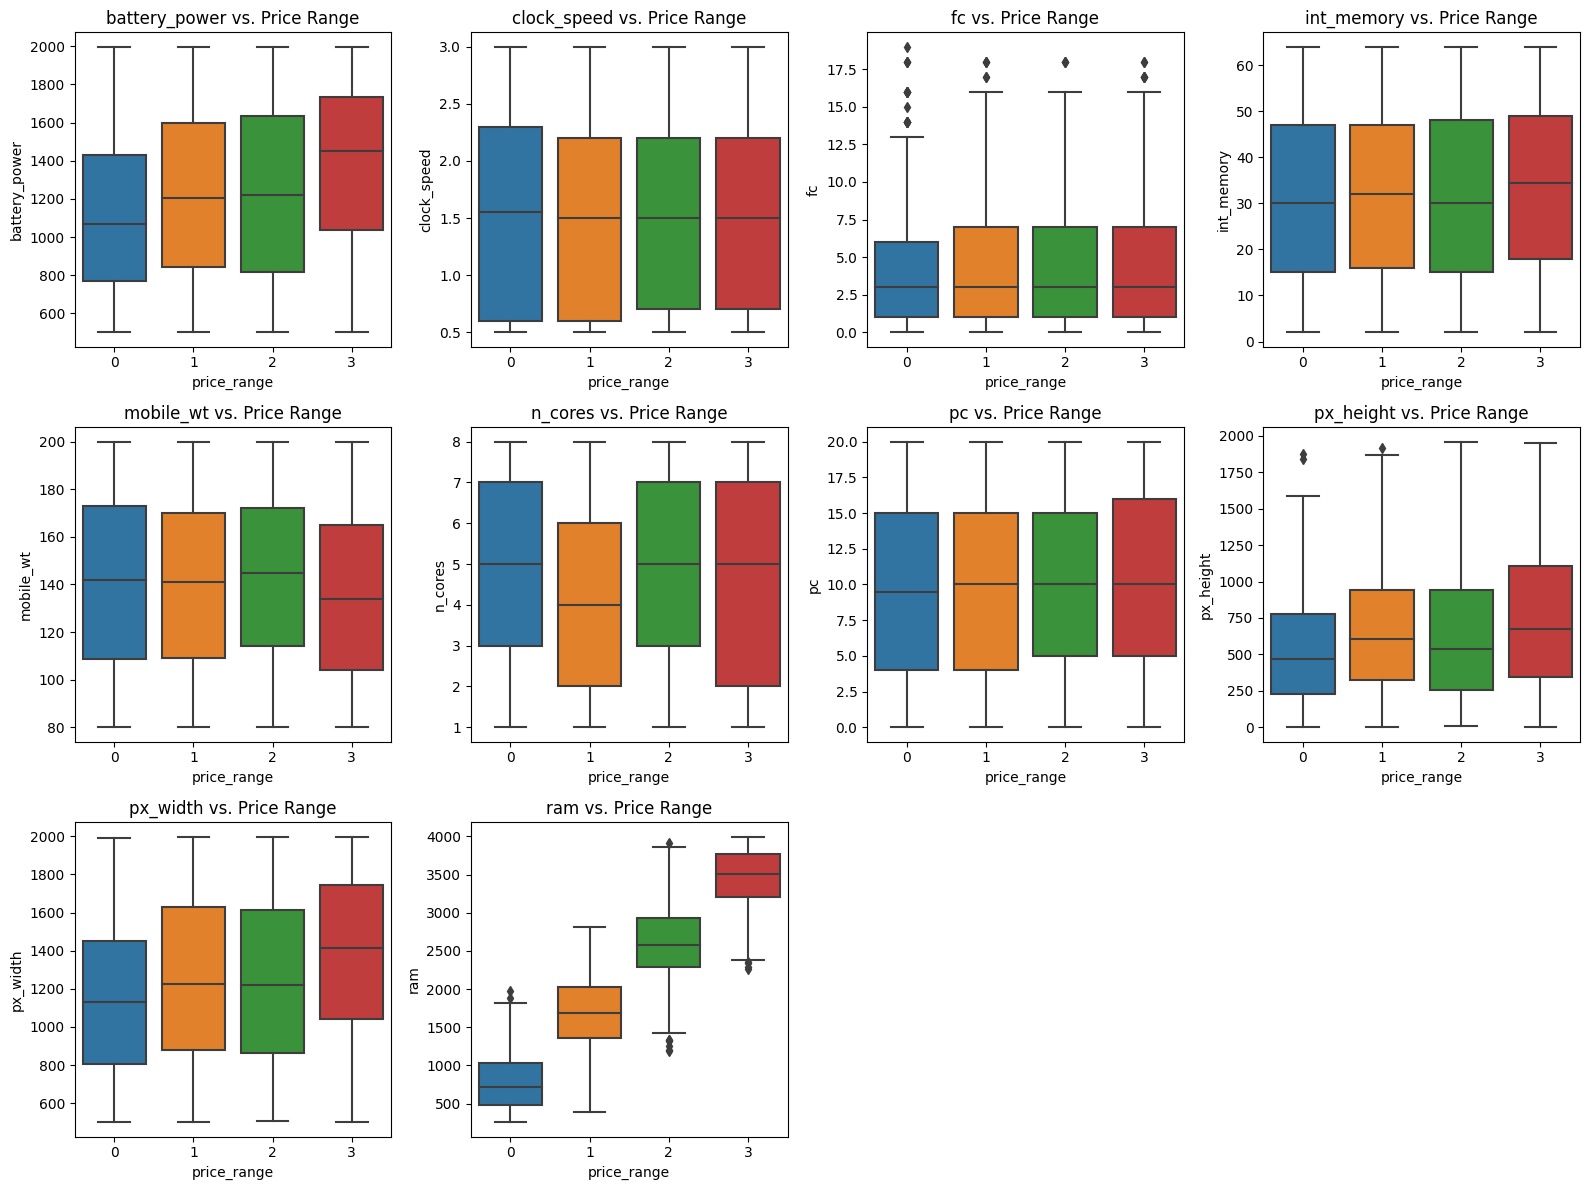

In [32]:
# Visualize the distribution of numerical features by price range
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram']
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='price_range', y=feature, data=train)
    plt.title(f'{feature} vs. Price Range')

plt.tight_layout()
plt.show()

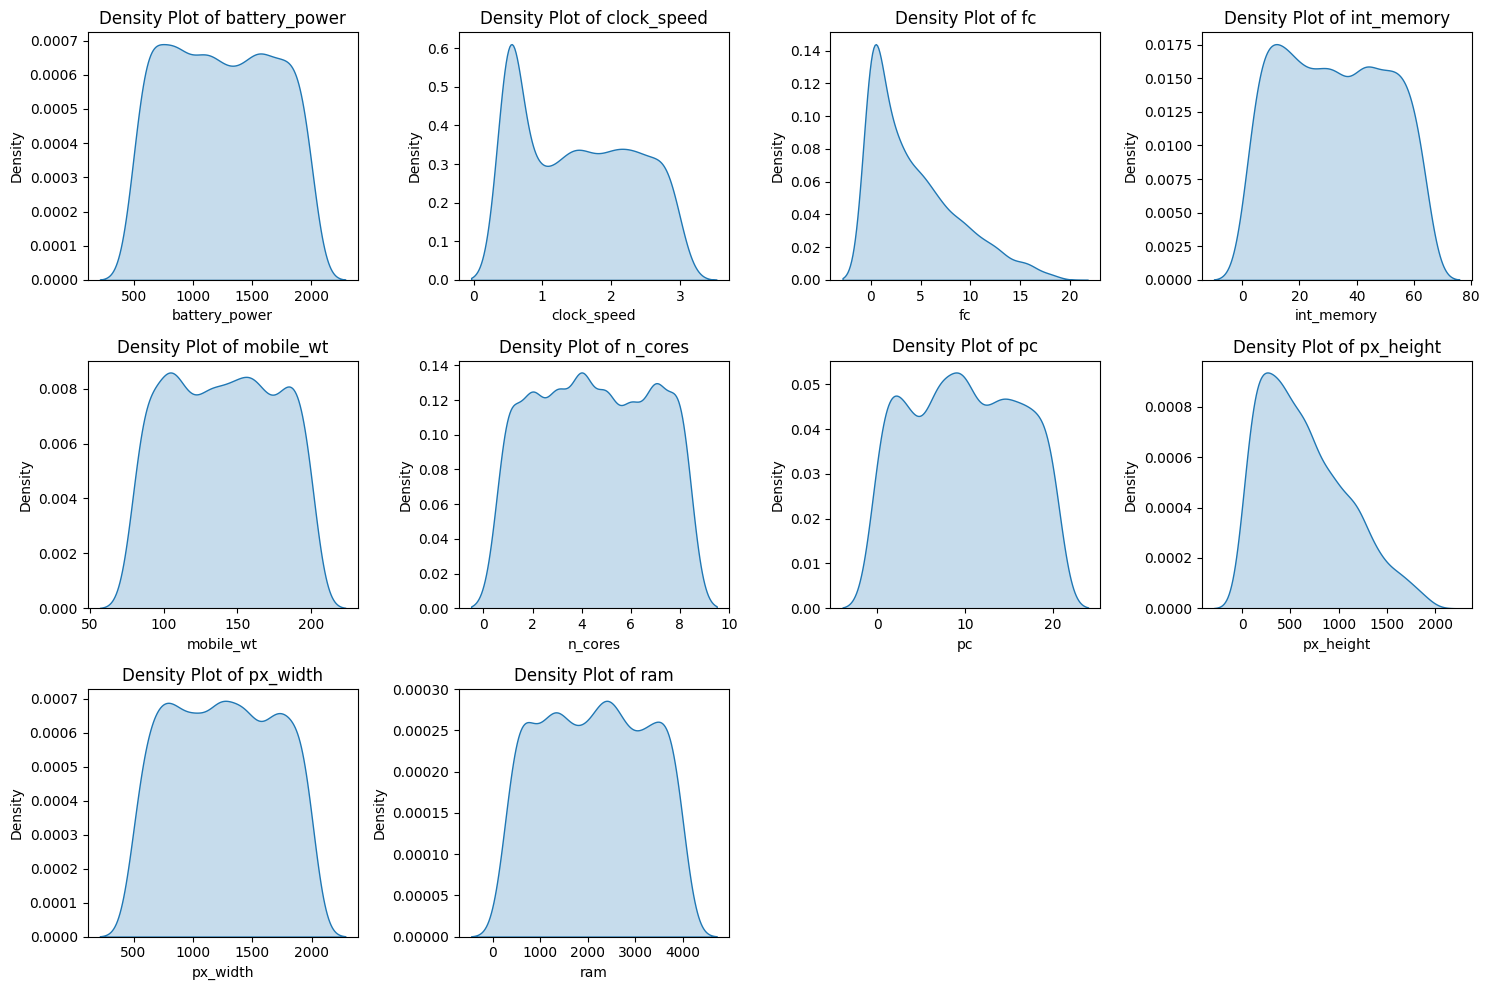

In [34]:
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)  # Adjust the grid dimensions as necessary
    sns.kdeplot(train[feature], fill=True)
    plt.title(f'Density Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

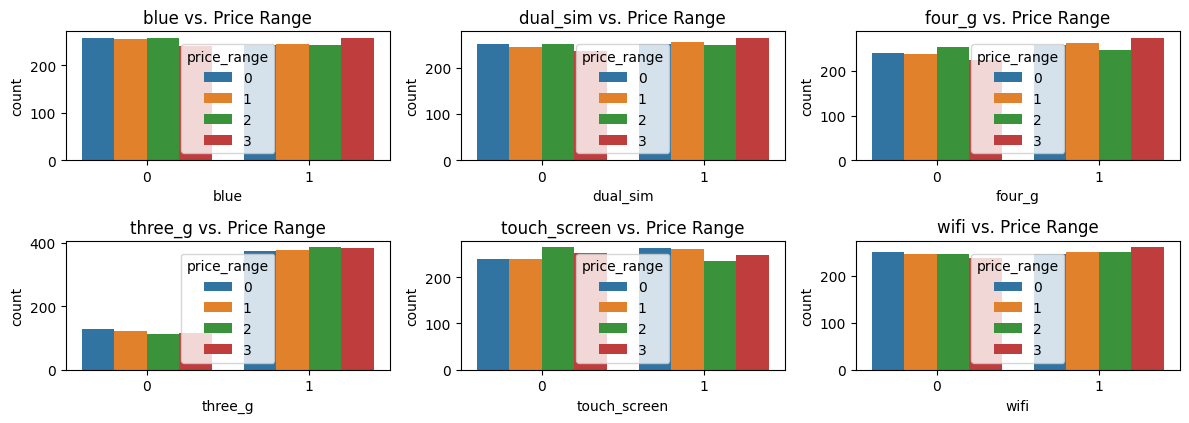

In [26]:
# Visualize the distribution of categorical features by price range
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='price_range', data=train)
    plt.title(f'{feature} vs. Price Range')

plt.tight_layout()
plt.show()

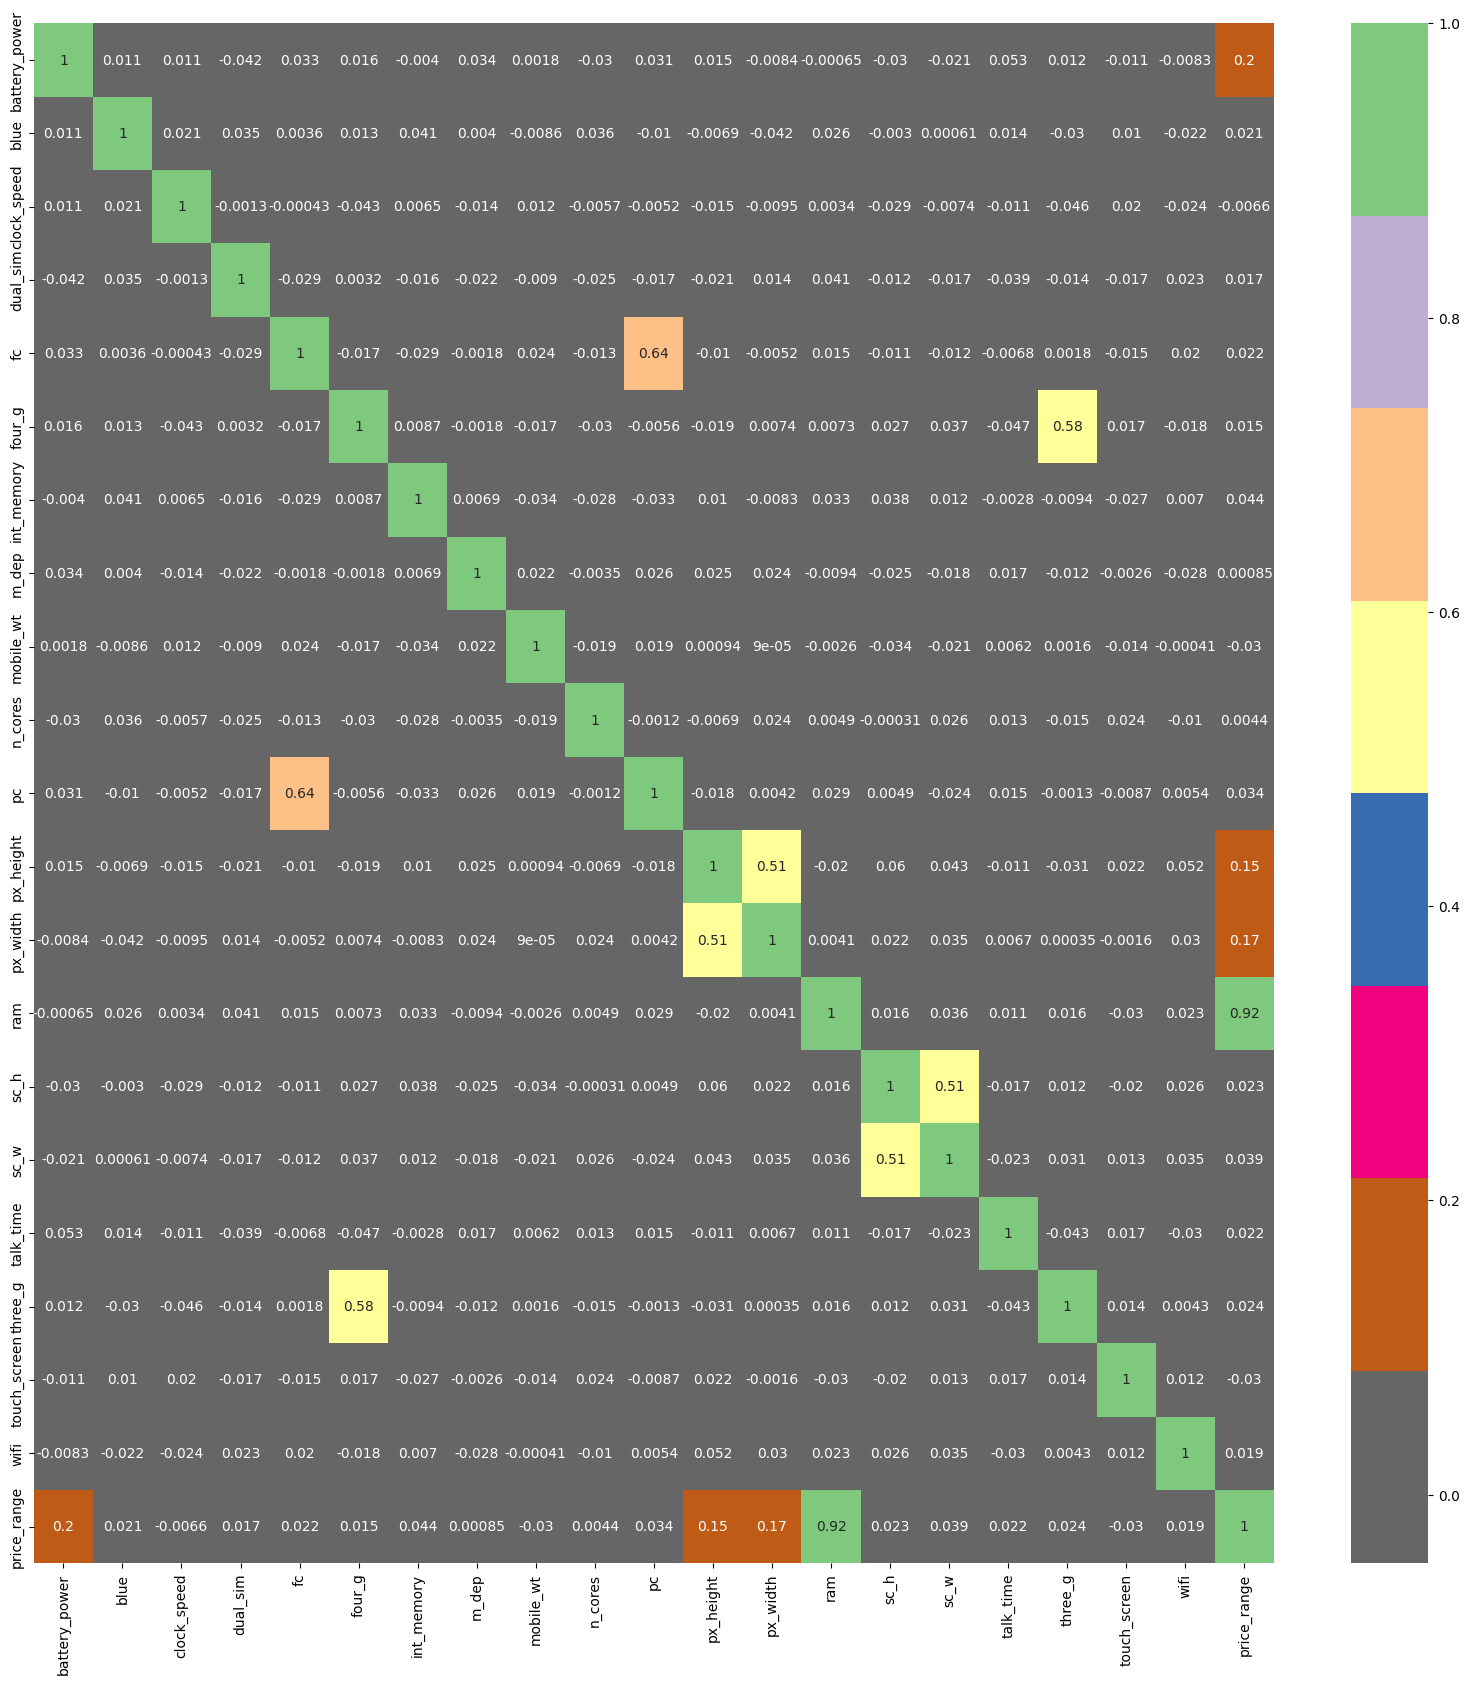

In [27]:
correlation = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

In [28]:
correlation['price_range'].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [29]:
# ANOVA for categorical features
from scipy.stats import f_oneway

for feature in categorical_features:
    groups = [group[1]['price_range'] for group in train.groupby(feature)]
    f_statistic, p_value = f_oneway(*groups)
    print(f"ANOVA for {feature}:")
    print(f"F-Statistic: {f_statistic:.2f}")
    print(f"P-Value: {p_value:.4f}\n")

ANOVA for blue:
F-Statistic: 0.85
P-Value: 0.3578

ANOVA for dual_sim:
F-Statistic: 0.61
P-Value: 0.4356

ANOVA for four_g:
F-Statistic: 0.44
P-Value: 0.5091

ANOVA for three_g:
F-Statistic: 1.11
P-Value: 0.2912

ANOVA for touch_screen:
F-Statistic: 1.85
P-Value: 0.1740

ANOVA for wifi:
F-Statistic: 0.71
P-Value: 0.4011



In [31]:
# Correlation tests for numerical features
from scipy.stats import pearsonr, spearmanr

numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram']
for feature in numerical_features:
    # Pearson correlation test
    pearson_corr, pearson_p_value = pearsonr(train[feature], train['price_range'])
    # Spearman correlation test
    spearman_corr, spearman_p_value = spearmanr(train[feature], train['price_range'])
    print(f"Correlation tests for {feature}:")
    print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_p_value:.4f})")
    print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p_value:.4f})\n")

Correlation tests for battery_power:
Pearson Correlation: 0.20 (p-value: 0.0000)
Spearman Correlation: 0.20 (p-value: 0.0000)

Correlation tests for clock_speed:
Pearson Correlation: -0.01 (p-value: 0.7678)
Spearman Correlation: -0.01 (p-value: 0.8080)

Correlation tests for fc:
Pearson Correlation: 0.02 (p-value: 0.3255)
Spearman Correlation: 0.02 (p-value: 0.2800)

Correlation tests for int_memory:
Pearson Correlation: 0.04 (p-value: 0.0469)
Spearman Correlation: 0.04 (p-value: 0.0477)

Correlation tests for mobile_wt:
Pearson Correlation: -0.03 (p-value: 0.1755)
Spearman Correlation: -0.03 (p-value: 0.1768)

Correlation tests for n_cores:
Pearson Correlation: 0.00 (p-value: 0.8441)
Spearman Correlation: 0.00 (p-value: 0.8353)

Correlation tests for pc:
Pearson Correlation: 0.03 (p-value: 0.1331)
Spearman Correlation: 0.03 (p-value: 0.1423)

Correlation tests for px_height:
Pearson Correlation: 0.15 (p-value: 0.0000)
Spearman Correlation: 0.13 (p-value: 0.0000)

Correlation tests for